# DBSCAN(Density Based Spatial Clustering of Applications with Noise, PCA를 이용한 차원 축소)
- 데이터 분포가 기하학적으로 복잡한 경우에도 잘 적용됨
- 특정 공간 내에서 데이터 밀도 차이를 기반으로 군집화
- 데이터 포인트
    - 이웃 포인트(Neighbor point): 주변 영역 내에 위치한 타 데이터
    - 핵심 포인트(Core point): 자신 + 이웃 포인트가 최소 데이터 개수 이상인 경우
    - 경계 포인트(Border point): 핵심 포인트는 아니지만 핵심 포인트를 이웃 포인트로 갖는 경우
    - 잡음 포인트(Noise point): 나머지 경우

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

%matplotlib inline

In [2]:
hw = pd.read_csv(r'C:\Users\arceu\Desktop\homework\hw.csv')

hw_target = hw['target']
hw_features = hw.drop('target', axis=1, inplace=False)

df = pd.DataFrame(hw_features, columns=['f1', 'f2', 'f3', 'f4', 'f5'])
df['target'] = hw_target

In [3]:
dbscan = DBSCAN(eps=0.2, min_samples=8) # epsilon이 0.2 일때 군집이 나뉘어지고 noise도 감지할 수 있었다
dbscan_label = dbscan.fit_predict(hw_features)
df['dbscan_label'] = dbscan_label

print(df.groupby('target')['dbscan_label'].value_counts())

target  dbscan_label
0        1              489
        -1               11
1        0              494
        -1                6
2        1              492
        -1                8
3        0              486
        -1               14
Name: dbscan_label, dtype: int64


In [4]:
hw_scaled = StandardScaler().fit_transform(hw_features) # data 정규화

In [5]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(hw_scaled)
df['component1'] = pca_transformed[:, 0]
df['component2'] = pca_transformed[:, 1]
df.head()

,f1,f2,f3,f4,f5,target,dbscan_label,component1,component2
0,1.030972,-0.449614,0.581358,1.480586,2.511557,1,0,1.644055,-1.228175
1,0.902691,0.372013,1.274705,0.530678,1.433370,0,1,0.688298,0.634505
2,-0.658288,0.761872,0.103584,-1.420159,-2.078447,0,1,-2.713460,0.232228
3,1.908221,0.360373,2.268593,1.547848,3.456069,1,0,2.674492,1.468642
4,0.877666,0.153999,1.031665,0.723666,1.601332,0,1,0.825820,0.089616


In [6]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['component1'], y=label_cluster['component2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

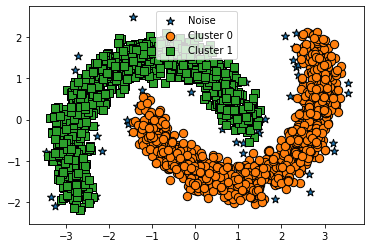

In [7]:
visualize_cluster_plot(dbscan, df, 'dbscan_label', iscenter=False)